<a href="https://colab.research.google.com/github/manusmriti31/Learning_PyTorch/blob/main/Video%20notebooks/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # PyToch Workflow
 Let's explore an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

 # What we are covering:
 1. Data (prepare and load)
 2. Build model
 3. Fitting the model to data (training)
 4. Making predictions and evaluating a model (inference)
 5. Saving and loading a model
 6. Putting it all together

In [ ]:
import torch
import numpy as np
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

## 1. Data (preparing and loading)

Data can be alomost anything... in machine learining
* Excel spreadsheet
* Images of any kind
* videos (YouTube has lots of data....)
* Audio like songs or podcasts
* DNA
* Text

Machine learinging is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [ ]:
# Creat *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)
lets create a training and test set with our data

In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"VIsualize, Visualize, Visualize!"

In [ ]:
def plot_prediction(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, predictions = None):
  """Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")

  #Plot test data in green
  plt.scatter(test_data, test_label, c = 'g', s = 4, label = "Testing data")

  # Are there predictions ?
  if predictions is not None:
    #plot the predictions if they exists
    plt.scatter(test_data,predictions, c = 'r', s = 4, label = "Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

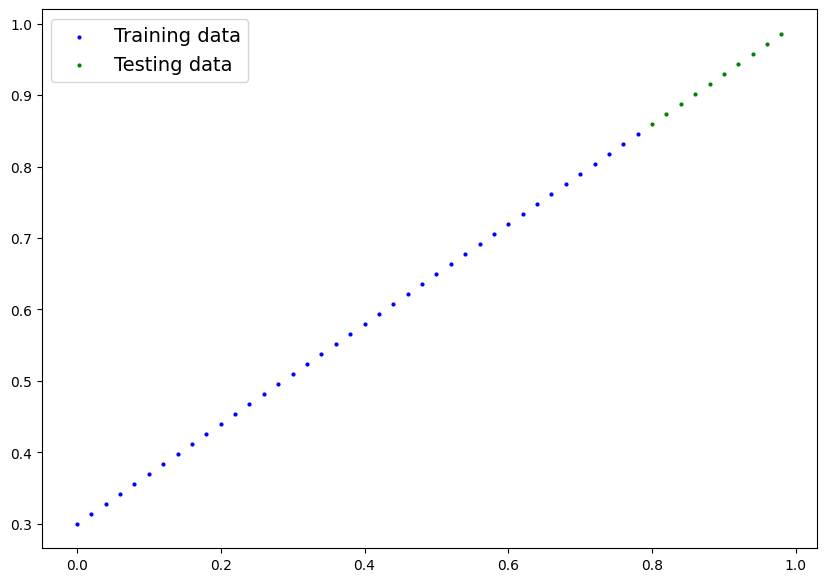

In [ ]:
plot_prediction()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in python, to do so you can use the following resources from Real Python: https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal vallues (the weight & bias values we used to create the data)

How does it do so?

THrough two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backprpogation - https://youtu.be/Ilg3gGewQ5U

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad= True, dtype = torch.float))

  # Forward method to define the computation in the model
  # Will always need to overide this forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - This is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation

see more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegression()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [ ]:
# Make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torchl.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

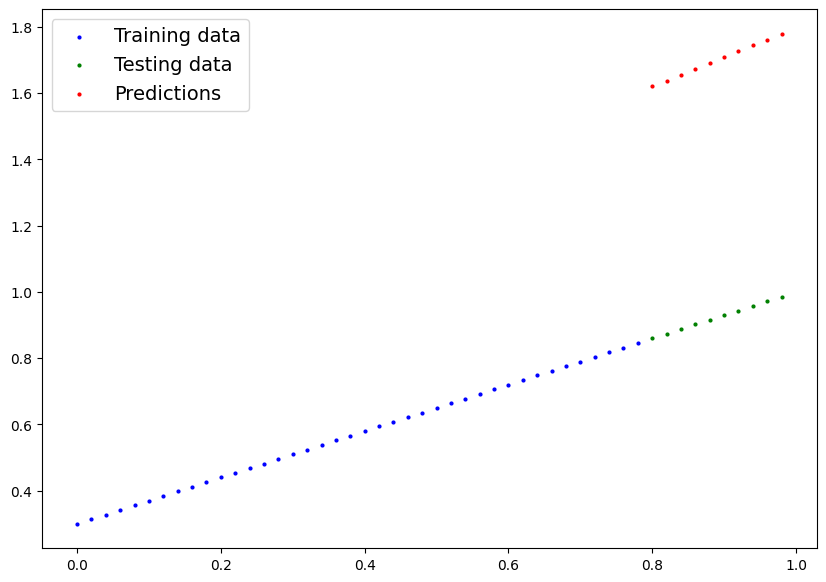

In [ ]:
plot_prediction(predictions = y_preds)

## 3. Train model
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.y_preds

Or in other words from a poor representation of the data to a better presentation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.
* Note: Loss function may also be called cost function or criterion indifferent areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss function:** A function to measure how wrong your model's predictions are to the ideal output, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (eg. weight & bias in our case) to imporve the loss function - https://pytorch.org/docs/stable/optim.html#module-torch.optim
  * Inside the optimizer you'll often have to set two parametsrs:
    * `params` - The model parameters you'd like to optimize, for example `params = model_0.parameters()`
    * `lr` (learning rate) - The learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# Check our model's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

> Q: Which loss function and optimizer should I use?
>
> A: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
>
> For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.
>
> But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

### Building a training loop and a testing loop in PyTorch
A couple of things we need in a training loop:

0. Loop through the data and do.....
1. Forward pass (this involves moving the data through the Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent - https://youtu.be/IHZwWFHWa-w))

In [ ]:
# an epoch is one loop through the data.... (this is a hyperparameter because we've set it ourself)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # training mode in pytorch sets all the parameters that require gradient to set gradients

  # 1. forward method
  y_pred = model_0(X_train)

  # 2. Set the loss function
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. set the optimizer (perform the gradient desent)
  optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # Turns off different setting in the model which are not needed for testing/evaluation
  with torch.inference_mode():
  # you can also find torch.no_grad() in some previous versions of the PyTorch code, thsus that also works fine but inference is the new one
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Claculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(model_0.state_dict())


Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Loss: 0.5708791017532349 | Test Loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Loss: 0.45566922426223755 | Test Loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Loss: 0.34045934677124023 | Test Loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Loss: 0.2252494841814041 | Test Loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Loss: 0.1100396141409874 | Test Loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Loss: 0.009724985808134079 | Test Loss: 0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])

In [ ]:
loss_values, test_loss_values

([array(0.6860889, dtype=float32),
  array(0.5708791, dtype=float32),
  array(0.45566922, dtype=float32),
  array(0.34045935, dtype=float32),
  array(0.22524948, dtype=float32),
  array(0.11003961, dtype=float32),
  array(0.00972499, dtype=float32),
  array(0.00621675, dtype=float32),
  array(0.00278832, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32),
  array(0.00709595, dtype=float32)],
 [tensor(0.7638),
  tensor(0.6290),
  tensor(0.4943),
  tensor(0.3596),
  tensor(0.2249),
  tensor(0.0902),
  tensor(0.0210),
  tensor(0.0141),
  tensor(0.0058),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.

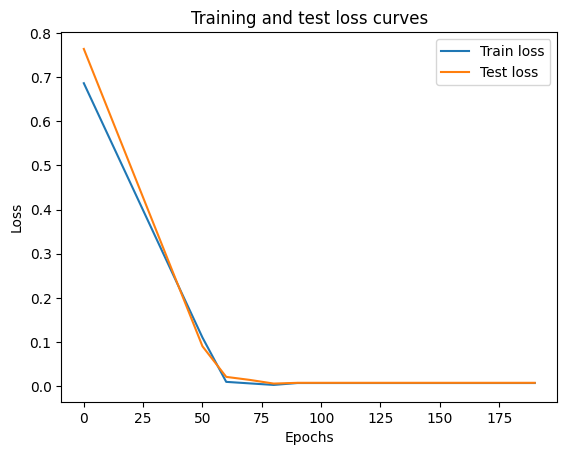

In [ ]:
# Plot the loss curve
plt.plot(epoch_count, loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

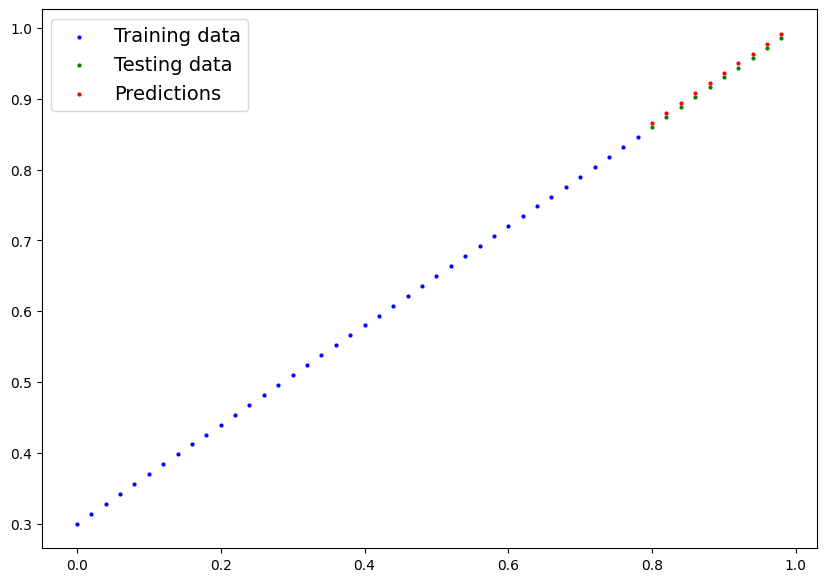

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  plot_prediction(predictions=y_preds_new)

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

## Saving a model in PyTorch
There are three main methods you should about for saving and loading models in PyTorch.model_0

1. `torch.save()` - allows you save a PyTorch object in Python's pickel format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allwos to load a model's saaved state dictionary

PyTorch save & load code tutorial - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [ ]:
# Saving our PyTorch model
from pathlib import Path
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `saved_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# To load in a saved state_dict we have to instatiate a new instance of our model calss
loaded_model_0 = LinearRegression()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<ipython-input-24-1bb2a5ec85cc>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
# Compare loaded model preds with original model preds
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together
Let's go back through the steps above and see it all in one place

In [ ]:
# Importing all the necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check the PyTorch version
torch.__version__

'2.4.1+cu121'

Create device agnostic code.

This means if we've got access to a GPY, our code will use it (fpr potentially faster computing)

If no GPU is available, the code will default to using GPU.

In [ ]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

Device: cuda


 ### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create ragne values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Splitting the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(train_data,train_label,test_data,test_label,predictions = None):

  '''Plots training data, test data and predictions'''

  # Plotting the training data in blue
  plt.scatter(train_data,train_label,c = 'b', s = 4, label = "Training data")

  # Plotting the test data in green
  plt.scatter(test_data,test_label,c = 'g', s = 4, label = "Testing data")

  # Plotting the predictions data
  if predictions is not None:
    # Plot the prediction data in red
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Predictions")

  # Show the legend
  plt.legend(prop = {"size": 14})

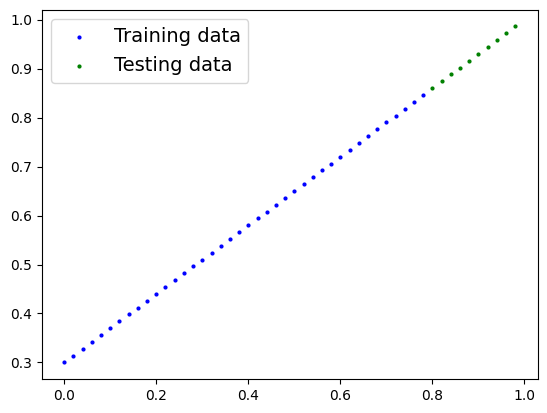

In [ ]:
# Plot the data
plot_prediction(X_train,y_train,X_test,y_test)

### 6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.linear for creating the model parameters / also called as: Linear transform, probing layer, fully connected layer
    self.linear_layer = nn.Linear(in_features = 1, out_features= 1)

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup the loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup the optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.001)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_preds = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

  # Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.010256479494273663 | Test loss: 0.012454724870622158
Epoch: 10 | Loss: 0.0006695442134514451 | Test loss: 0.0014927327865734696
Epoch: 20 | Loss: 0.0003230251313652843 | Test loss: 0.0006653607124462724
Epoch: 30 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 40 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 50 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 60 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 70 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 80 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 90 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 100 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 110 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 120 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 130 | Lo

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2998], device='cuda:0'))])

In [ ]:
weight,bias

(0.7, 0.3)

### 6.4 Making and evaluationg predictions

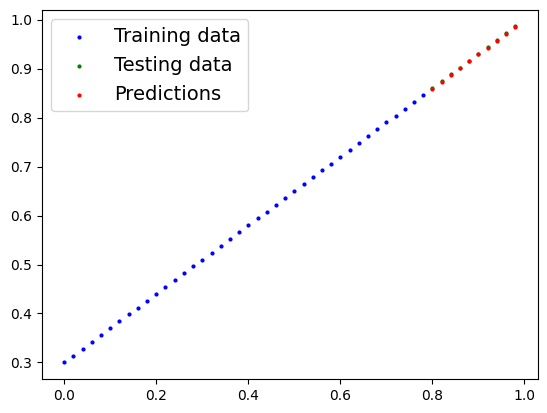

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  predictions = model_1(X_test)
  plot_prediction(X_train.cpu(),y_train.cpu(),X_test.cpu(),y_test.cpu(),predictions.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_mode_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_mode_1.pth


In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved mode_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)
next(loaded_model_1.parameters()).device

<ipython-input-79-8839499008ed>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2998], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)

predictions == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises & Extra-curruculum

For exercises & extra-curriculam, refer to: https://www.learnpytorch.io/01_pytorch_workflow/#exercises
